### Hands-On PMML ### 

mnist + cnn

In [1]:
import keras
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model2 = Sequential()
model2.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.summary()

/Users/iannn/Documents/S2 MKA/PMML/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,866 (413.54 KB)

 Trainable params: 105,866 (413.54 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history = model2.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))
model2.save('mnist+cnn.h5')
model2.evaluate(X_test,y_test)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - acc: 0.8463 - loss: 0.5226 - val_acc: 0.9765 - val_loss: 0.0737
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9774 - loss: 0.0746 - val_acc: 0.9842 - val_loss: 0.0510
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9852 - loss: 0.0503 - val_acc: 0.9861 - val_loss: 0.0404
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9884 - loss: 0.0372 - val_acc: 0.9875 - val_loss: 0.0389
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - acc: 0.9902 - loss: 0.0297 - val_acc: 0.9865 - val_loss: 0.0400
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - acc: 0.9929 - loss: 0.0232 - val_acc: 0.9897 - val_loss: 0.0332
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - acc: 0.9932 - loss: 0.0205 - val_acc: 0.9891 - val_loss: 0.0332
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9960 - loss: 0.0133 - val_acc: 0.9895 - val_loss: 0.0371
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9843 - loss: 0.0471


[0.0370328314602375, 0.9879999756813049]

In [4]:
import numpy as np
from keras.models import load_model
model_simpan2 = load_model('mnist+cnn.h5')
pred = model_simpan2.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
label actual: 3
label prediction: 3


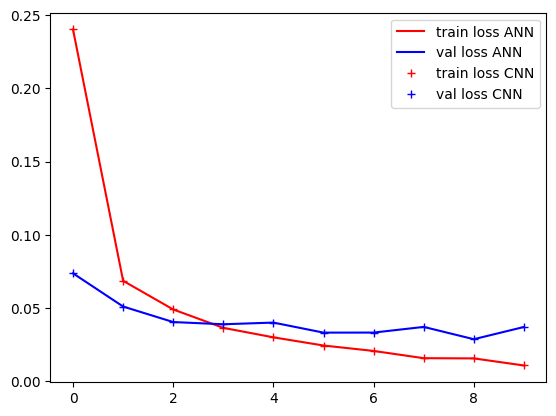

In [5]:
import matplotlib.pyplot as plt
epochs = range(10)
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']
plt.plot(epochs,loss1,'r',label='train loss ANN')
plt.plot(epochs,val_loss1,'b',label='val loss ANN')
loss2 = history.history['loss']
val_loss2 = history.history['val_loss']
plt.plot(epochs,loss2,'r+',label='train loss CNN')
plt.plot(epochs,val_loss2,'b+',label='val loss CNN')
plt.legend()